In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tqdm.notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

from modular_splicing.models_for_testing.main_models import AM, FM_full

from modular_splicing.evaluation.predict_motifs import predict_motifs

from modular_splicing.data_for_experiments.standardized_sample import (
    standardized_sample,
)
from modular_splicing.motif_names import get_motif_names

In [4]:
cl = 50
xs, _ = standardized_sample("dataset_test_0.h5", 1_000, cl)

In [5]:
def freq(m):
    mot = predict_motifs(m.model, xs)[:,cl//2:-cl//2, :79]
    mot = mot != 0
    mot = mot.mean((0, 1))
    mot = mot * 100
    return mot

def all_freqs(m):
    return np.array([freq(m) for m in tqdm.tqdm(m.non_binarized_models())])

freq_am = all_freqs(AM)
freq_fm = all_freqs(FM_full)
dfreq = freq_am - freq_fm

In [6]:
rbns_names = get_motif_names("rbns")
mask = np.array([x in get_motif_names("rbns_functional") for x in rbns_names])

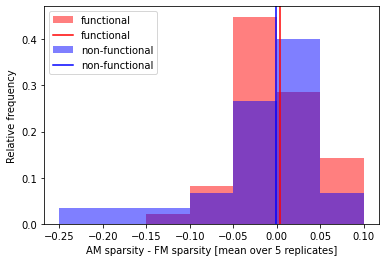

In [7]:
dfreq_mean = dfreq.mean(0)
binsize = 0.05
bins = (
    np.arange(np.floor(dfreq_mean.min() / binsize), np.ceil(dfreq_mean.max() / binsize))
    * binsize
)


def relhist(vs, **kwargs):
    plt.hist(vs, alpha=0.5, bins=bins, weights=np.ones_like(vs) / vs.size, **kwargs)
    plt.axvline(vs.mean(), **kwargs)


relhist(dfreq_mean[mask], label="functional", color="red")
relhist(dfreq_mean[~mask], label="non-functional", color="blue")
plt.xlabel("AM sparsity - FM sparsity [mean over 5 replicates]")
plt.ylabel("Relative frequency")
plt.legend()
plt.show()
# plt.xlim(-)